# Mini projet: étude du réchauffement clilmatique

On va tenter de répondre à 2 questions ici: le réchauffement observée dans les mesures de température est il significatif, et l'activité solaire est elle lié à cette observation?



### Partie 1: mise en évidence de l'élevation de température


Les données sur lesquelles on va se baser sont celles enregsitrées sur lal station météo de Montélimar, déjà utilisées dans les exercices, et également accessibles sur gitHub au lien suivant: https://raw.githubusercontent.com/phys-mod/site/master/source/notebooks/05-ajustement-modele/TG_STAID000786.txt



In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Récupération des données
# Emlacement à modifier suivant utilisateur
a = np.loadtxt('ECA_blended_custom/TG_STAID000786.txt',skiprows = 20,delimiter=',')
station_id = a[:,0]
date = a[:,1]
T = a[:,2]/10
Q = a[:,3] # facteur de qualité
# Use valid data only
date = date[Q == 0]
T = T[Q == 0]

# Construction de la variable de temps
dt = []
for d in date:
    Y = str(d)[0:4]
    M = str(d)[4:6]
    d = str(d)[6:8]
    #print(Y,M,d)
    dt.append(np.datetime64(Y+'-'+M+'-'+d))
dt = np.array(dt)  # On enregistre les variables d etemps comme un numpy.array de datetime64.

print("Il y a",len(T)," mesures de température dans ce fichier entre",min(dt),"et",max(dt))

Il y a 36517  mesures de température dans ce fichier entre 1920-08-17 et 2020-08-10


(701129.0, 737647.0)

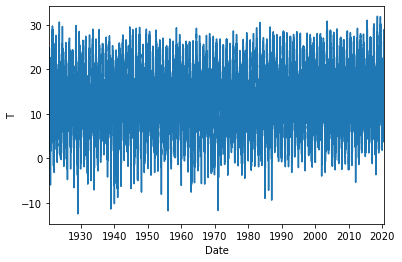

In [3]:
plt.figure()
plt.plot(dt,T)
plt.xlabel('Date')
plt.ylabel('T')
plt.xlim(min(dt),max(dt))


Les fluctuations quotidiennes semblent contribuer aux variations de température observées. 

Pour les atténuer, on va calculer la moyenne de température sur un mois. 

In [5]:
# Definition d'un tableau de datetimes mensuel sur la durée considérée.
date_limits = np.arange(np.min(dt), np.max(dt), step = np.timedelta64(1,'M'), dtype='datetime64[M]')

# Calcul de la valeur moyenne sur chaque tranche mensuelle.
T_mensuel = []
i = 0
while i<len(date_limits)-1:
    sel = np.logical_and(dt>=date_limits[i],dt<date_limits[i+1])
    T_mensuel.append(np.mean(T[sel]))   
    print(date_limits[i],date_limits[i+1],np.mean(T[sel]))
    i = i+1
    
date_limits = date_limits[:-1]
T_mensuel = np.array(T_mensuel)

1920-08 1920-09 18.646666666666665
1920-09 1920-10 18.776666666666664
1920-10 1920-11 14.516129032258064
1920-11 1920-12 7.870000000000001
1920-12 1921-01 3.9354838709677415
1921-01 1921-02 6.958064516129033
1921-02 1921-03 5.710714285714286
1921-03 1921-04 9.074193548387095
1921-04 1921-05 11.34
1921-05 1921-06 16.90967741935484
1921-06 1921-07 20.803333333333335
1921-07 1921-08 24.683870967741942
1921-08 1921-09 21.312903225806455
1921-09 1921-10 20.209999999999997
1921-10 1921-11 16.032258064516128
1921-11 1921-12 6.840000000000002
1921-12 1922-01 5.516129032258062
1922-01 1922-02 4.4064516129032265
1922-02 1922-03 6.875
1922-03 1922-04 9.083870967741934
1922-04 1922-05 10.866666666666667
1922-05 1922-06 18.309677419354834
1922-06 1922-07 20.060000000000002
1922-07 1922-08 20.4741935483871
1922-08 1922-09 22.13870967741935
1922-09 1922-10 16.1
1922-10 1922-11 12.535483870967743
1922-11 1922-12 6.733333333333333
1922-12 1923-01 5.629032258064515
1923-01 1923-02 4.574193548387097
1923

1961-11 1961-12 7.786666666666667
1961-12 1962-01 6.038709677419355
1962-01 1962-02 6.690322580645161
1962-02 1962-03 4.839285714285714
1962-03 1962-04 6.361290322580645
1962-04 1962-05 11.846666666666668
1962-05 1962-06 14.454838709677418
1962-06 1962-07 18.973333333333326
1962-07 1962-08 22.39032258064516
1962-08 1962-09 23.554838709677416
1962-09 1962-10 18.683333333333334
1962-10 1962-11 13.719354838709679
1962-11 1962-12 6.6833333333333345
1962-12 1963-01 1.5516129032258064
1963-01 1963-02 0.40322580645161316
1963-02 1963-03 1.8321428571428573
1963-03 1963-04 8.59032258064516
1963-04 1963-05 12.71
1963-05 1963-06 15.806451612903224
1963-06 1963-07 18.786666666666665
1963-07 1963-08 22.474193548387095
1963-08 1963-09 19.54193548387097
1963-09 1963-10 17.56
1963-10 1963-11 13.470967741935487
1963-11 1963-12 10.973333333333331
1963-12 1964-01 2.070967741935484
1964-01 1964-02 2.9354838709677415
1964-02 1964-03 7.386206896551723
1964-03 1964-04 8.051612903225806
1964-04 1964-05 12.473

1984-08 1984-09 20.97096774193549
1984-09 1984-10 17.25
1984-10 1984-11 13.83548387096774
1984-11 1984-12 10.790000000000001
1984-12 1985-01 5.577419354838711
1985-01 1985-02 -0.39032258064516123
1985-02 1985-03 6.882142857142858
1985-03 1985-04 6.877419354838709
1985-04 1985-05 12.66
1985-05 1985-06 14.777419354838708
1985-06 1985-07 18.263333333333332
1985-07 1985-08 23.76129032258064
1985-08 1985-09 21.348387096774193
1985-09 1985-10 20.973333333333336
1985-10 1985-11 15.048387096774198
1985-11 1985-12 5.8166666666666655
1985-12 1986-01 6.7225806451612895
1986-01 1986-02 4.841935483870969
1986-02 1986-03 2.2892857142857146
1986-03 1986-04 8.86774193548387
1986-04 1986-05 9.733333333333336
1986-05 1986-06 17.383870967741935
1986-06 1986-07 20.07333333333333
1986-07 1986-08 23.603225806451615
1986-08 1986-09 22.674193548387098
1986-09 1986-10 19.633333333333336
1986-10 1986-11 15.829032258064517
1986-11 1986-12 10.053333333333336
1986-12 1987-01 5.896774193548388
1987-01 1987-02 0.580

2005-02 2005-03 3.789285714285715
2005-03 2005-04 9.035483870967743
2005-04 2005-05 12.0
2005-05 2005-06 17.245161290322585
2005-06 2005-07 22.693333333333335
2005-07 2005-08 24.048387096774192
2005-08 2005-09 21.809677419354838
2005-09 2005-10 19.559999999999995
2005-10 2005-11 16.370967741935484
2005-11 2005-12 8.18
2005-12 2006-01 3.6709677419354843
2006-01 2006-02 3.5387096774193543
2006-02 2006-03 5.003571428571429
2006-03 2006-04 9.02258064516129
2006-04 2006-05 13.616666666666669
2006-05 2006-06 17.14516129032258
2006-06 2006-07 21.5
2006-07 2006-08 26.40322580645161
2006-08 2006-09 20.735483870967744
2006-09 2006-10 20.86666666666667
2006-10 2006-11 17.05806451612903
2006-11 2006-12 11.530000000000001
2006-12 2007-01 6.006451612903226
2007-01 2007-02 7.2709677419354835
2007-02 2007-03 8.385714285714286
2007-03 2007-04 10.190322580645159
2007-04 2007-05 15.840000000000002
2007-05 2007-06 17.69677419354839
2007-06 2007-07 20.76333333333333
2007-07 2007-08 22.45483870967742
2007-0

Quelques plots pour vérifier le résultat:

Temperature moyenne sur la decennie 1930 : 12.875134684481877
Temperature moyenne sur la decennie 1950 : 12.9567172056253
Temperature moyenne sur la decennie 2010 : 14.550952976852587


Text(0, 0.5, 'T')

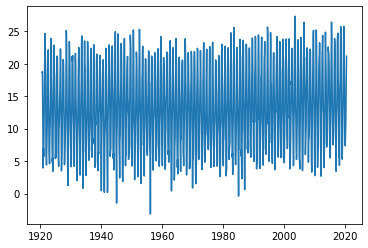

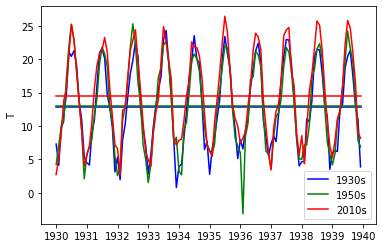

In [6]:
T_mensuel = np.array(T_mensuel)

plt.figure()
plt.plot(date_limits,T_mensuel)

decade = np.arange(np.datetime64('1930','Y'), np.datetime64('1940','Y'), step = np.timedelta64(1,'M'), dtype='datetime64[M]')

plt.figure()
c = ['b','g','r']
dec = [1930,1950,2010]
for i,d in enumerate(dec):
  sel = np.logical_and(date_limits>=np.datetime64(str(d),'Y'),date_limits<np.datetime64(str(d+10),'Y'))
  plt.plot(decade,T_mensuel[sel],c[i],label=str(d)+'s')
  plt.plot([min(decade), max(decade)],[np.mean(T_mensuel[sel]),np.mean(T_mensuel[sel])],c[i])
  print("Temperature moyenne sur la decennie",dec[i],':',np.mean(T_mensuel[sel]))

plt.legend()
plt.ylabel('T')


Les fluctuations statistiques sont clairement atténuées grace au moyennage, et ce sont maintenant les variations saisonnières qui dominent et compliquent l'analyse. On va donc les modéliser par une sinuosoide.

Amplitude: 8.882434096345962 +- 0.07257296656224699 C .
Periode: 11.999964333566957 +- 0.0005401297458885333 mois .
Phase: 4.62852495302988 +- 0.0081649518607554 mois .
Tmoy: 13.339906617659624 +- 0.051297124851925995 C .


(701113.0, 737577.0)

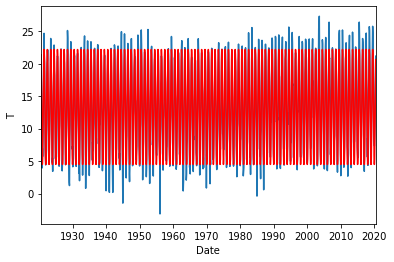

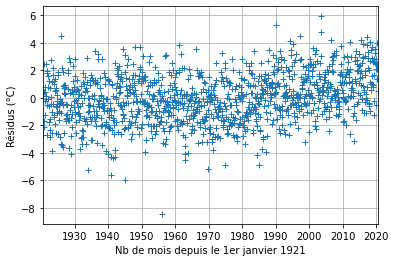

In [7]:
import scipy.optimize as opt

# Definition del afonction d'ajustement
def SinWave(x,a,T0,phi,c): 
    omega = 2*np.pi/T0
    return a*np.sin(omega*x+phi)+c

#### Pour faire des plots avec une variable réele
#x = date_limits[sel]
#xf = x.astype("float") # Month counts, necessaire pour représenter la fonction de fit

plt.figure()
plt.plot(date_limits,T_mensuel)
plt.xlabel('Date')
plt.ylabel('T')

fit_param, var = opt.curve_fit(SinWave,date_limits,T_mensuel,[20,12,3,10])
perr = np.sqrt(np.diag(var))
ParaNames = ['Amplitude:','Periode:','Phase:','Tmoy:']
ParaUnits = ['C','mois','mois','C']
for i in range(len(fit_param)):
    print(ParaNames[i],fit_param[i],'+-',perr[i],ParaUnits[i],'.')

xf = date_limits.astype("float")    
y_th = fit_param[0]*np.sin(2*np.pi/fit_param[1]*xf+fit_param[2])+fit_param[3]
plt.plot(date_limits,y_th,'r')
plt.xlim([min(date_limits),max(date_limits)])


# Résidus
res = T_mensuel-y_th
plt.figure()
plt.plot(date_limits,res,'+')
plt.grid('True')
plt.xlabel('Nb de mois depuis le 1er janvier 1921')
plt.ylabel('Résidus (°C)')
plt.xlim([min(date_limits),max(date_limits)])



La tendance au réchauffement commence à apparaitre plus clairement. Pour la faire ressortir de manière statistique, on va faire des ajustements sinusoidaux par tranches de 10 ans.

1920 1930 [ 8.70922863 12.02278426  4.09732695 13.04439467]
1930 1940 [ 8.62288897 11.9984116   4.62934118 12.87620941]
1940 1950 [ 9.33464489 12.00681826  4.5727735  13.0705561 ]
1950 1960 [ 8.87625838 12.00718786  4.56842505 12.95166413]
1960 1970 [ 8.86800105 12.01579899  4.6085962  12.80229754]
1970 1980 [ 8.47977533 11.99323736  4.59764888 12.69843561]
1980 1990 [ 9.09669473 12.00442044  4.60683142 13.23538563]
1990 2000 [ 8.80589105 11.99453647  4.57353442 13.82229093]
2000 2010 [ 9.09581836 11.99666296  4.59756031 14.20749992]
2010 2020 [ 9.09648392 12.00101069  4.63453673 14.55022863]


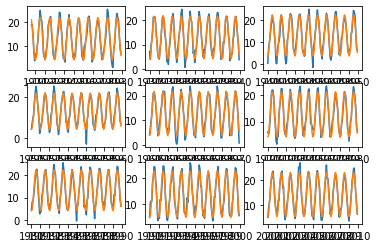

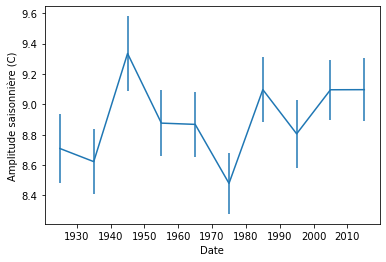

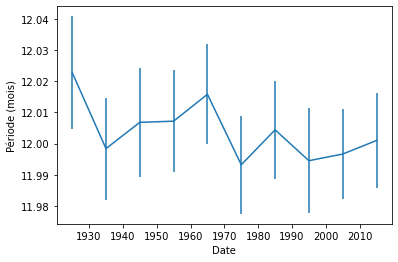

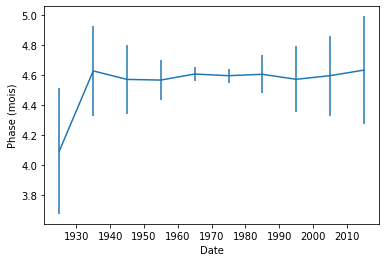

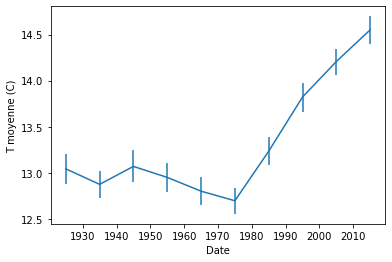

In [31]:
mois = date_limits

# Definitiion des trabnche par décennie
step = 10
date_min = np.datetime64('1920','Y')
date_max = np.datetime64('2021','Y')
tranches = np.arange(date_min, date_max, step = np.timedelta64(step,'Y'), dtype='datetime64[Y]')

# Ajustement sur chaque tranche
par_all = []
err_all = []
moy_all = []
std_all = []
i = 0
plt.figure()
subid = 351
while i<len(tranches)-1:
    sel = np.logical_and(mois>=tranches[i],mois<tranches[i+1])
    fit_param, var = opt.curve_fit(SinWave,mois[sel],T_mensuel[sel],[20,12,3,10])
    perr = np.sqrt(np.diag(var))
    print(tranches[i],tranches[i+1],fit_param)
    par_all.append(fit_param)
    err_all.append(perr)
    moy_all.append(np.mean(T_mensuel[sel]))
    std_all.append(np.std(T_mensuel[sel]))
    
    subid = 331+i
    # Plot ^)atr tranches
    if i<9:
        plt.subplot(subid)
        plt.plot(mois[sel],T_mensuel[sel])
        xf = mois[sel].astype("float")    
        y_th = fit_param[0]*np.sin(2*np.pi/fit_param[1]*xf+fit_param[2])+fit_param[3]
        plt.plot(mois[sel],y_th)
    i = i+1

# resultats
tranches = tranches + np.timedelta64(int(step/2),'Y')    
par_all = np.array(par_all)
par_all.reshape(len(tranches)-1,4)
err_all = np.array(err_all)
err_all.reshape(len(tranches)-1,4)

labels = ['Amplitude saisonnière (C)', 'Période (mois)', 'Phase (mois)', 'T moyenne (C)']
for i in range(4):
    plt.figure()  
    plt.errorbar(tranches[:-1],par_all[:,i],err_all[:,i])
    plt.xlabel('Date')
    plt.ylabel(labels[i])
    

On voit maintenant très clairement que les temperatures décennales moyennes des périodes 1920-1990 et 1990-2020 ne sont pas compatibles. Le réchauffement climatique est significatif au regard des barres d'erreur déterminées par l'ajustement.

Note:  on aurait probablement pu  arriver à la meme conclusion avec un fit par une constante par tranche décennale, mais c'est moins joli!

### Partie 2: corrélation à l'activité solaire

On va tester l'hypothèse selon laquelle le réchauffement climatique serait lié à uen activité solaire plus importante.

Pour cela on va utiliser des données d'observations directes des taches solaires, dont le nombre est fortement corrélé à l'irradiance solaire. Celle ci en est déduite par une méthode de regression baptisée EMPIRE. Les données de la période 1947-2016 sont accessibles sur https://www2.mps.mpg.de/projects/sun-climate/data.html.

Text(0, 0.5, 'Total solar irradiance (W/m²)')

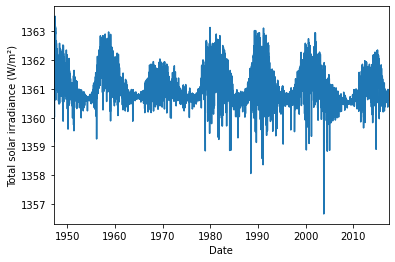

In [21]:
import pandas as pd
epoch = pd.to_datetime(0, unit='s').to_julian_date()
pd.to_datetime(2432231 - epoch, unit='D')

a = np.loadtxt("TSI.txt",comments=';')
jd = a[:,0]  # Jour julien
# Transformation en datetime.
date_tsi = pd.to_datetime(jd - epoch, unit='D')
date_tsi = np.array(date_tsi, dtype='datetime64[D]')  
tsi = a[:,1]

plt.plot(date_tsi,tsi)
plt.xlim([min(date_tsi),max(date_tsi)])
plt.xlabel("Date")
plt.ylabel("Total solar irradiance (W/m²)")

Comme pour les relevés de température vus précédement on observe une forte variabilité, due à des fluctuations (statistiques) de courte période, et à un effet de modulation d'une période de 11 ans environ.

On commence par faire un moyennage annuel pour attenuer les fluctuations statistiques.

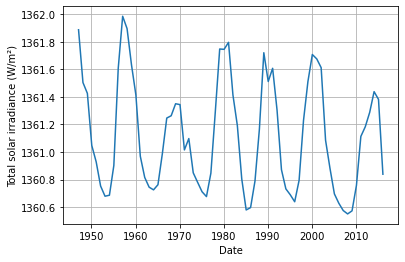

In [26]:
year_limits = np.arange(np.min(date_tsi), np.max(date_tsi), step = np.timedelta64(1,'Y'), dtype='datetime64[M]')
TSI_annuel = []
T_annuel = []
i = 0
while i<len(year_limits)-1:
    sel1 = np.logical_and(date_tsi>=year_limits[i],date_tsi<year_limits[i+1])
    TSI_annuel.append(np.mean(tsi[sel1]))   
    sel2 = np.logical_and(dt>=year_limits[i],dt<year_limits[i+1])
    T_annuel.append(np.mean(T[sel2]))   
    
    #print(year_limits[i],year_limits[i+1],np.mean(tsi[sel1]),np.mean(T[sel2]))
    i = i+1

year_limits = year_limits[:-1]    
TSI_annuel = np.array(TSI_annuel)
T_annuel = np.array(T_annuel)

plt.plot(year_limits,TSI_annuel)
plt.xlabel("Date")
plt.ylabel("Total solar irradiance (W/m²)")
plt.grid('True')

On fait ensuite un ajustement sinusoidal par tranches de 10 ans afin de faciliter la comparaison avec le traitement précédent sur les températures.

[Ca n'est bien sûr pas optimal pour étudier des phénomènes de période de 11 ans, mais bon. ]

1950 1960 [6.52256450e-01 1.09491937e+01 2.05756807e+00 1.36122352e+03]
1960 1970 [3.44528328e-01 1.08845326e+01 1.92731405e+00 1.36102103e+03]
1970 1980 [2.05725498e-01 9.75923277e+00 9.92055409e-01 1.36101211e+03]
1980 1990 [6.29039223e-01 1.08899924e+01 6.83858318e+00 1.36117047e+03]
1990 2000 [-4.99503795e-01  1.08884561e+01  3.70291327e+00  1.36108001e+03]
2000 2010 [-6.53752185e-01  1.13158752e+01  1.19747516e+01  1.36115686e+03]


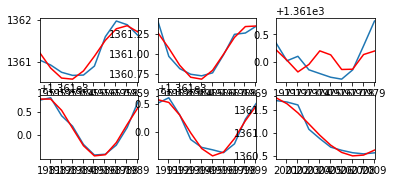

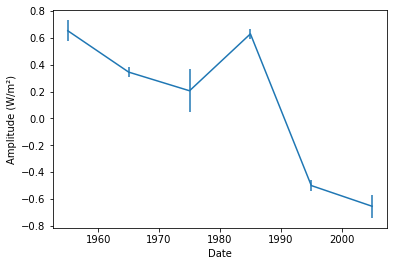

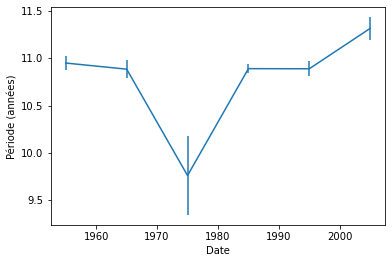

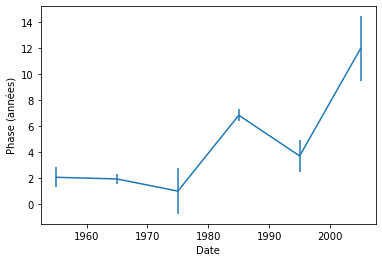

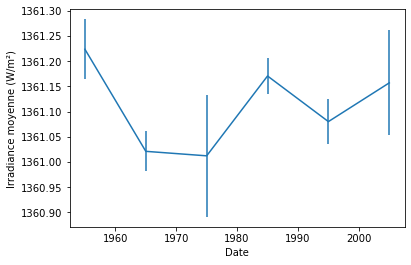

In [54]:
step = 10
date_min = np.datetime64('1950','Y')
date_max = np.datetime64('2016','Y')
tranches_tsi = np.arange(date_min, date_max, step = np.timedelta64(step,'Y'), dtype='datetime64[Y]')

par_tsi = []
err_tsi = []
i = 0
while i<len(tranches_tsi)-1:
    sel = np.logical_and(year_limits>=tranches_tsi[i],year_limits<tranches_tsi[i+1])
    fit_param, var = opt.curve_fit(SinWave,year_limits[sel],TSI_annuel[sel],[0.1,11,0,1361])
    #fit_param = [0.1,11,0.5,1361]
    perr = np.sqrt(np.diag(var))
    print(tranches_tsi[i],tranches_tsi[i+1],fit_param)
    par_tsi.append(fit_param)
    err_tsi.append(perr)
    
    subid = 331+i
    plt.subplot(subid)
    plt.plot(year_limits[sel],TSI_annuel[sel])
    
    xf = year_limits[sel].astype("float") # Month counts
    y_th = fit_param[0]*np.sin(2*np.pi/fit_param[1]*xf+fit_param[2])+fit_param[3]
    plt.plot(year_limits[sel],y_th,'r')
    plt.xlim([min(year_limits[sel]),max(year_limits[sel])])
    i = i+1

tranches_tsi = tranches_tsi + np.timedelta64(int(step/2),'Y')    
par_tsi = np.array(par_tsi)
par_tsi.reshape(len(tranches_tsi)-1,4)
err_tsi = np.array(err_tsi)
err_tsi.reshape(len(tranches_tsi)-1,4)

labels = ['Amplitude (W/m²)', 'Période (années)', 'Phase (années)', 'Irradiance moyenne (W/m²)']
for i in range(4):
    
    plt.figure()  
    plt.errorbar(tranches_tsi[:-1],par_tsi[:,i],err_tsi[:,i], elinewidth=None)
    plt.xlabel('Date')
    plt.ylabel(labels[i])

L'ajustement est assez bon (sauf sur la 3eme tranche), et on retrouve bien une période de 11 ans pour les autres tranches

On pourrait critiquer le fait de choisir une phase indépendante d'une tranche à l'autre, mais imposer une phase commune compliquerait beaucoup le traitement. On s'en satisfera donc.

Il ne reste plus qu'à comparer les valeurs moyennes par décennie à celles déterminées pour les températures. 

Pente =  0.04734512245533263 +- 0.06717168775137534


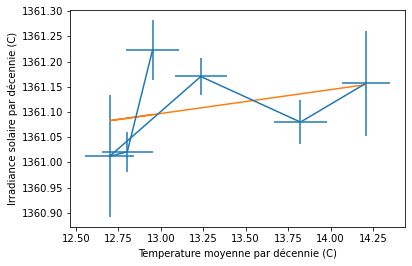

In [57]:
_,ind,ind_tsi = np.intersect1d(tranches[:-1],tranches_tsi[:-1],return_indices=True)

def affine(x,a,b):
    return a+b*x

plt.figure()
plt.errorbar(par_all[ind,3],par_tsi[ind_tsi,3],err_tsi[ind_tsi,3],err_all[ind,3],elinewidth=None)
plt.xlabel('Temperature moyenne par décennie (C)')
plt.ylabel('Irradiance solaire par décennie (C)')

fit_param, pcov = opt.curve_fit(affine,par_all[ind,3],par_tsi[ind_tsi,3],sigma=par_tsi[ind_tsi,3] )
y_fit = fit_param[1]*par_all[ind,3] + fit_param[0]
plt.plot(par_all[ind,3],y_fit)
perr = np.sqrt(np.diag(pcov))
print("Pente = ",fit_param[1],"+-",perr[1])


La valeur de la pente est de l'ordre de son incertitude. 

On peut donc conclure qu'il n'y a pas de corrélation significative entre temperature et irradiance solaire, à rebours de la théorie proposée par Lassen. On pouvait en fait s'en rendre compte en observant que l'activité solaire n'a pas notablement évoluée depyuis 1945 (cf plot précédent).

En complément on pourra souligner que cette absence de corrélation est confirmée par des analyse plus poussées (l'hypothèse de l'effet des rayons comsiques sur la formation des nuages a été invalidée (https://science.sciencemag.org/content/354/6316/1119), et q